In [7]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [8]:
import tensorflow as tf
import glob
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import segmentation_models as sm

In [9]:
images_train = glob.glob("./data/A.%20Segmentation/A. Segmentation/1. Original Images/a. Training Set/*.jpg")
images_test = glob.glob("./data/A.%20Segmentation/A. Segmentation/1. Original Images/b. Testing Set/*.jpg")
masks_train = glob.glob("./data/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/5. Optic Disc/*.tif")
masks_test = glob.glob("./data/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/b. Testing Set/5. Optic Disc/*.tif")
images_train.sort()
images_test.sort()
masks_train.sort()
masks_test.sort()
len(images_train), len(masks_train), len(images_test), len(masks_test)

(54, 54, 27, 27)

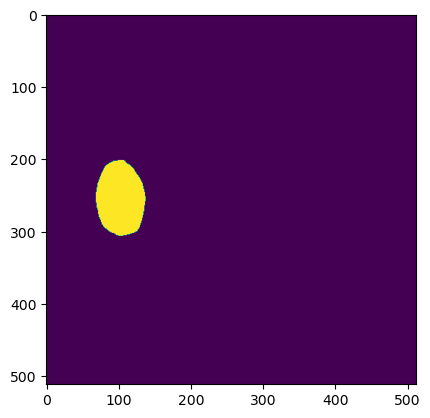

In [10]:
image_train=[]
image_test=[]
mask_train=[]
mask_test=[]
for x in images_train:
    im=cv2.imread(x,cv2.IMREAD_COLOR)
    im=cv2.resize(im,(512,512))
    image_train.append(im)
for x in images_test:
    im=cv2.imread(x,cv2.IMREAD_COLOR)
    im=cv2.resize(im,(512,512))
    image_test.append(im)
for y in masks_train:
    ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
    ma=cv2.resize(ma,(512,512),interpolation = cv2.INTER_NEAREST)
    plt.imshow(ma)
    mask_train.append(ma)
for y in masks_test:
    ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
    ma=cv2.resize(ma,(512,512),interpolation = cv2.INTER_NEAREST)
    plt.imshow(ma)
    mask_test.append(ma)


img_array_t=np.array(image_train)
mask_array_t=np.array(mask_train)
mask_array_t=np.expand_dims(mask_array_t,axis=-1)
img_array_v=np.array(image_test)
mask_array_v=np.array(mask_test)
mask_array_v=np.expand_dims(mask_array_v,axis=-1)
mask_array_t=mask_array_t.astype(np.float32)
mask_array_v=mask_array_v.astype(np.float32)

a=np.where(mask_array_t==76)
mask_array_t[a]=1
b=np.where(mask_array_v==76)
mask_array_v[b]=1
plt.imshow(mask_array_t[20])

In [11]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing
sm.set_framework('tf.keras')
sm.framework()
BACKBONE = 'efficientnetb4'

preprocess_input = get_preprocessing(BACKBONE)
model = Unet(BACKBONE, input_shape=(512,512,3),encoder_weights='imagenet',activation='sigmoid')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics = ['binary_accuracy',tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC(),sm.metrics.IOUScore(),sm.metrics.FScore()])

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
mp=ModelCheckpoint('best_seg model.h5',save_best_only=True,monitor='val_iou_score')
lrp=ReduceLROnPlateau(monitor="iou_score", factor=0.1, patience=2)
es=EarlyStopping(patience=2,monitor='iou_score')
call=[lrp]
history=model.fit(img_array_t, 
          mask_array_t,
          batch_size=1, 
          epochs=70,
          validation_data=(img_array_v, mask_array_v),callbacks=call)

Epoch 1/70
54/54 [==============================] - 184s 3s/step - loss: 0.1749 - binary_accuracy: 0.9767 - recall: 0.8968 - precision: 0.4298 - auc: 0.9760 - iou_score: 0.1299 - f1-score: 0.2248 - val_loss: 31.2945 - val_binary_accuracy: 0.0385 - val_recall: 1.0000 - val_precision: 0.0177 - val_auc: 0.5439 - val_iou_score: 0.0177 - val_f1-score: 0.0349 - lr: 0.0010
Epoch 2/70
54/54 [==============================] - 157s 3s/step - loss: 0.0360 - binary_accuracy: 0.9973 - recall: 0.9405 - precision: 0.9149 - auc: 0.9978 - iou_score: 0.3444 - f1-score: 0.5071 - val_loss: 1.7951 - val_binary_accuracy: 0.5695 - val_recall: 1.0000 - val_precision: 0.0387 - val_auc: 0.9522 - val_iou_score: 0.0387 - val_f1-score: 0.0743 - lr: 0.0010
Epoch 3/70
54/54 [==============================] - 158s 3s/step - loss: 0.0172 - binary_accuracy: 0.9979 - recall: 0.9515 - precision: 0.9357 - auc: 0.9981 - iou_score: 0.5208 - f1-score: 0.6835 - val_loss: 0.1770 - val_binary_accuracy: 0.9514 - val_recall: 0.99

54/54 [==============================] - 202s 4s/step - loss: 0.0104 - binary_accuracy: 0.9987 - recall: 0.9656 - precision: 0.9640 - auc: 0.9999 - iou_score: 0.6391 - f1-score: 0.7790 - val_loss: 0.0219 - val_binary_accuracy: 0.9942 - val_recall: 0.8458 - val_precision: 0.8253 - val_auc: 0.9899 - val_iou_score: 0.5045 - val_f1-score: 0.6619 - lr: 1.0000e-13
Epoch 24/70
54/54 [==============================] - 210s 4s/step - loss: 0.0104 - binary_accuracy: 0.9987 - recall: 0.9660 - precision: 0.9631 - auc: 0.9999 - iou_score: 0.6391 - f1-score: 0.7791 - val_loss: 0.0214 - val_binary_accuracy: 0.9944 - val_recall: 0.8457 - val_precision: 0.8350 - val_auc: 0.9901 - val_iou_score: 0.5068 - val_f1-score: 0.6642 - lr: 1.0000e-14
Epoch 25/70
54/54 [==============================] - 225s 4s/step - loss: 0.0104 - binary_accuracy: 0.9987 - recall: 0.9665 - precision: 0.9631 - auc: 0.9999 - iou_score: 0.6394 - f1-score: 0.7792 - val_loss: 0.0215 - val_binary_accuracy: 0.9944 - val_recall: 0.8487

Epoch 45/70
54/54 [==============================] - 180s 3s/step - loss: 0.0105 - binary_accuracy: 0.9987 - recall: 0.9660 - precision: 0.9619 - auc: 0.9999 - iou_score: 0.6388 - f1-score: 0.7788 - val_loss: 0.0218 - val_binary_accuracy: 0.9942 - val_recall: 0.8484 - val_precision: 0.8239 - val_auc: 0.9901 - val_iou_score: 0.5060 - val_f1-score: 0.6633 - lr: 1.0000e-24
Epoch 46/70
54/54 [==============================] - 177s 3s/step - loss: 0.0104 - binary_accuracy: 0.9987 - recall: 0.9658 - precision: 0.9633 - auc: 0.9999 - iou_score: 0.6390 - f1-score: 0.7790 - val_loss: 0.0219 - val_binary_accuracy: 0.9942 - val_recall: 0.8468 - val_precision: 0.8249 - val_auc: 0.9901 - val_iou_score: 0.5049 - val_f1-score: 0.6624 - lr: 1.0000e-25
Epoch 47/70
54/54 [==============================] - 188s 3s/step - loss: 0.0104 - binary_accuracy: 0.9987 - recall: 0.9663 - precision: 0.9642 - auc: 0.9999 - iou_score: 0.6395 - f1-score: 0.7793 - val_loss: 0.0217 - val_binary_accuracy: 0.9943 - val_re

Epoch 67/70
54/54 [==============================] - 272s 5s/step - loss: 0.0104 - binary_accuracy: 0.9987 - recall: 0.9659 - precision: 0.9639 - auc: 0.9999 - iou_score: 0.6395 - f1-score: 0.7794 - val_loss: 0.0211 - val_binary_accuracy: 0.9945 - val_recall: 0.8509 - val_precision: 0.8368 - val_auc: 0.9910 - val_iou_score: 0.5094 - val_f1-score: 0.6668 - lr: 1.0000e-35
Epoch 68/70
54/54 [==============================] - 243s 5s/step - loss: 0.0104 - binary_accuracy: 0.9987 - recall: 0.9658 - precision: 0.9648 - auc: 0.9999 - iou_score: 0.6395 - f1-score: 0.7793 - val_loss: 0.0215 - val_binary_accuracy: 0.9944 - val_recall: 0.8478 - val_precision: 0.8318 - val_auc: 0.9903 - val_iou_score: 0.5069 - val_f1-score: 0.6643 - lr: 1.0000e-36
Epoch 69/70
54/54 [==============================] - 223s 4s/step - loss: 0.0104 - binary_accuracy: 0.9987 - recall: 0.9663 - precision: 0.9632 - auc: 0.9999 - iou_score: 0.6394 - f1-score: 0.7792 - val_loss: 0.0215 - val_binary_accuracy: 0.9944 - val_re

In [14]:
import pickle

In [15]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

INFO:tensorflow:Assets written to: ram://573152ad-d578-4193-8b74-30862c1682de/assets


INFO:tensorflow:Assets written to: ram://573152ad-d578-4193-8b74-30862c1682de/assets


In [16]:
with open('modelpkl','wb') as f:
    pickle.dump(model,f)

INFO:tensorflow:Assets written to: ram://78380fad-9b7a-472d-9f17-bd15644207e2/assets


INFO:tensorflow:Assets written to: ram://78380fad-9b7a-472d-9f17-bd15644207e2/assets


In [18]:
with open('model.pkl','rb') as f:
    mmm=pickle.load(f)

ValueError: Unable to restore custom object of type _tf_keras_metric. Please make sure that any custom layers are included in the `custom_objects` arg when calling `load_model()` and make sure that all layers implement `get_config` and `from_config`.